In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
file_path = 'gdrive/My Drive/Deep Learning Project/data_in_csv'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# %tensorflow_version 2.x

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as stl
stl.use('seaborn')
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM
from sklearn.model_selection import train_test_split

import os
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 9892245588469783906
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 7057256840426646962
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 5743433758910815781
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 15956161332
locality {
  bus_id: 1
  links {
  }
}
incarnation: 4971457381060161362
physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"
]


In [0]:
# file_path = 'gdrive/My Drive/Deep Learning Project/data_in_csv/Capsaicin.300nM/'
# traces=pd.read_csv(file_path+"traces.csv", index_col=0)
# labels=pd.read_csv(file_path+"labels.csv", index_col=0)
# X_train, X_test, y_train, y_test = train_test_split(traces, labels, test_size=0.33)

In [0]:
def plot_train_history(history, title):
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(len(loss))
  
  #Loss Plotter
  fig, axs = plt.subplots(2)
  fig.suptitle(title)
  axs[0].plot(epochs, loss, 'b', label='Training loss')
  axs[0].plot(epochs, val_loss, 'r', label='Validation loss')
  axs[0].set_title('Loss')
  axs[0].legend()

  trainAcc = history.history['acc']
  valAcc = history.history['val_acc']

  axs[1].plot(epochs, trainAcc, 'b', label='Training Accuracy')
  axs[1].plot(epochs, valAcc, 'r', label='Validation Accuracy')
  axs[1].set_title('Accuracy')
  axs[1].legend()

  fig.show()

  fig.savefig(title+'.png', bbox_inches='tight')

YIPPY KAY YAY!
Entering AITC.100uM Directory 


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 120, 32)           128       
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 60, 32)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 101       
Total params: 53,429
Trainable params: 53,429
Non-trainable params: 0
_________________________________________________________________
Train on 500 steps, validate on 50 steps
Epoch 1/25
500/500 [==============================] - 62s 123ms/step - loss: 0.4052 - acc: 0.8472 - val_loss: 0.4706 - val_acc: 0.7912
Epoch 2/25
500/500 [====

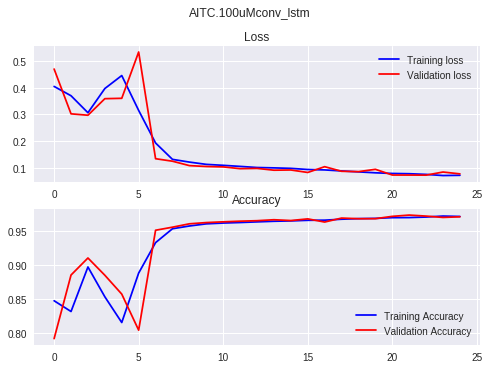

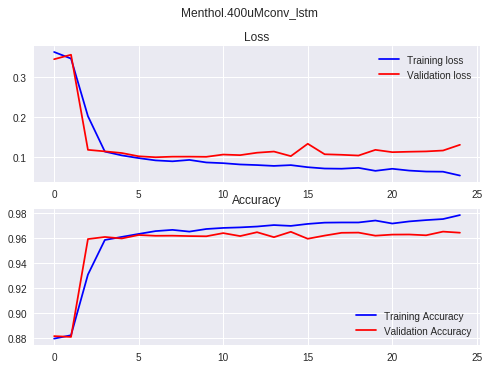

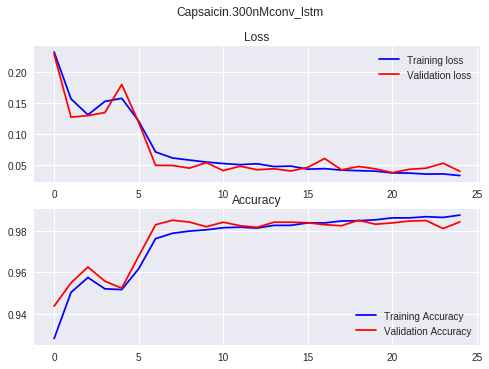

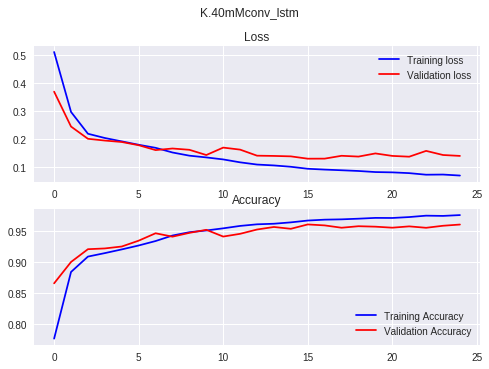

In [14]:
# # #This is where we are peakDeepDetect
superDir = os.getcwd()

#This is where we will be doing our work.
os.chdir('/content/gdrive/My Drive/Deep Learning Project/data_in_csv')#'/content/gdrive')
main_dir  = os.getcwd() #make it my main dir
#Find only Directories
expDirs  = next(os.walk('.'))[1]

#Loop Through Each Application!
for i in range(len(expDirs)):
  print("YIPPY KAY YAY!")
  print("Entering " + expDirs[i] +" Directory \n\n")
  os.chdir(expDirs[i])

    ######################################################################
  # First import the Traces
  traces = pd.read_csv("traces.csv", index_col=0)
  # some examples have na values get rid of
  traces = traces.dropna()
  tracesIndex = traces.index
    #Randomize!!
  tracesIndex = tracesIndex[np.random.permutation(len(tracesIndex))]
  traces = traces.loc[tracesIndex,]
  #This need to be a 3 dimensional numpy array
  traces = np.asarray(traces)
  #Add the new Dimension
  traces = traces[...,np.newaxis]

  #Load the Labels
  labels = pd.read_csv("labels.csv", index_col=0)
  #Load lables that match the traces above
  labels = labels.loc[tracesIndex,]
  #Convert to Category
  labels = labels.iloc[:,0].astype('category')
  #convert to np array
  labels = np.asarray(labels)

    #Create Train and Validation Set
  val = int(np.ceil(traces.shape[0]*.33))
  trainSize = traces.shape[0] - val 

  x_train  = traces[:trainSize,...]
  y_train = labels[:trainSize]

  x_test = traces[trainSize:,...]
  y_test = labels[trainSize:]

    # Now DO what we need for the import to LSTM
  BATCH_SIZE = 256
  BUFFER_SIZE = 10000
  train = tf.data.Dataset.from_tensor_slices((x_train, y_train))
  train = train.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

  test = tf.data.Dataset.from_tensor_slices((x_test, y_test))
  test = test.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

    #This Doesn't work for 3 dimension datasets
    #X_train, X_test, y_train, y_test = train_test_split(traces, labels, test_size=0.33)

    #Using this as a guide
    #https://machinelearningmastery.com/reshape-input-data-long-short-term-memory-networks-keras/

    #This Helps to guide the model and loss
    #https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/

    # Function to transform data set into 10 peices of 
    # Mean
    # Standard Deviation

    #To feed into LSTM we need 3 Dimensions
    # 1 # of samples (11063)
    # 2 # of features (2 mean and Standar Deviation)
    # 3 # of timesteps

  model = Sequential([
      tf.keras.layers.Conv1D(filters=32, kernel_size=3, padding='same', activation='relu',input_shape = traces.shape[-2:]),
      tf.keras.layers.MaxPooling1D(pool_size=2),
      tf.keras.layers.LSTM(100, input_shape = traces.shape[-2:]),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  model.compile(optimizer='adam',
              loss="binary_crossentropy",
              metrics=['acc'])

  model.summary()

  EVALUATION_INTERVAL = 500
  EPOCHS = 25

  history = model.fit(train, epochs = EPOCHS, 
                      steps_per_epoch=EVALUATION_INTERVAL,
                      validation_data = test,
                      validation_steps=50)

    # history = model.fit(x_train, y_train, epochs=25, 
    #                     validation_data=(x_test,y_test ))

  print("This is the loss vs Accuracy for" + expDirs[i])
  plot_train_history(history, expDirs[i]+"conv_lstm")     
    
    #Save the ModelYYYYYYYYYYY
  model.save(expDirs[i]+'exp1.h5')

    ##########################################################
    #Now that we have a model that works fairly well 
    #lets do some data analysis

    #These are Predicted Values
  labsPred = model.predict_classes(traces)
  labsPred = pd.DataFrame(labsPred) #convert to df

  #convert real to DataFrame
  labs = pd.DataFrame(labels)

  realTest = pd.concat([labs, labsPred], axis=1)

  realTest.columns = ['Real', "Predicted"]

  realTest = realTest.set_index(tracesIndex)

  realTest.to_csv('conv_lstm.csv')

    #These are Predicted Values
  realVsPredCT = pd.crosstab(np.asarray(labsPred).flatten(), np.asarray(labs).flatten(), rownames=['pred'], colnames=['real'])
  
  print(realVsPredCT)

  del model

  os.chdir(main_dir)


In [0]:
#####
#####
##### ESTO ES CODIGO DE R!!!
#####
#####


# gridPlotter <- function(traces, traceNames, fileName){


#     #Calculate the number of squares to have in the plot
#     gridDim <- ceiling(sqrt(length(traceNames)))
#     graphics.off()
#     #make a new dev
#     #dev.new(width=20,height=20)
#     fileName = paste0(fileName,'.png')
#     png(fileName, width=960, height=960)
#     par(mfrow=c(gridDim, gridDim), mai=c(0,0,0,0), bg='black')

#     #Plot Each trace!
#     for(i in 1:length(traceNames)){
#         par(bg='black', mai=c(0,0,0,0))
#         plot(as.numeric(traces[traceNames[i],]), ylim=c(-0.1, 1.1), col='white', lwd=1, type='l')
#         box('plot', lty='solid', col='white')
#     }
#     dev.off()

# }

# # Here I am going to visualize the misclassified traces with R.
# super_dir<-getwd()

# #Go to the Response folder
# setwd("./data_in_csv")
# main_dir <- getwd() #where i will hangout

# expDirs <- list.dirs(recursive = F)

# for(i in 1:length(expDirs)){
#     setwd(main_dir)
#     setwd(expDirs[i])

#     labsOrig <- read.csv('labels.csv', row.names=1) # original labels
#     labsComp <- read.csv('lstm.experiment1_labcomp.csv', row.names=1) # Labels from predictive model
#     traces <- read.csv('traces.csv', row.names=1) # Traces

#     #Proof they are the same
#     #identical(labsOrig[row.names(labscomp),], labscomp[,1])

#     #Find the examples where the predicted doesn't equal the original
#     mismatchLogic <- labsComp[,1] != labsComp[,2]
#     misMatched <- labsComp[mismatchLogic,]

#     # How many are 0's and how many are 1's
#     cat('\nThis is the Run Down of your mismatched in \n',expDirs[i], '\nOut of', dim(traces)[1], 'Traces\n')
#     print(summary(as.factor(misMatched[,1])))

#     # Find traces that were 0 and classified as 1's
#     logicZeros <- misMatched[,1] == 0
#     zeroNames <- row.names(misMatched[logicZeros,])
#     # Find traces that were 1 and classified as 0's
#     logicOnes <- misMatched[,1] == 1
#     oneNames <- row.names(misMatched[logicOnes,])

#     #Plot the zeros as Ones
#     gridPlotter(traces, zeroNames, 'lstmExp1ZerosAsOnes')
#     #Plot the Ones as Zeros
#     gridPlotter(traces, oneNames, 'lstmExp1OneAsZeros')

# }


SyntaxError: ignored

In [0]:
# file_path = 'gdrive/My Drive/Deep Learning Project/data_in_csv/Capsaicin.300nM/'
# traces=pd.read_csv(file_path+"traces.csv", index_col=0)
# labels=pd.read_csv(file_path+"labels.csv", index_col=0)
# X_train, X_test, y_train, y_test = train_test_split(traces, labels, test_size=0.33)

In [0]:
# file_path = 'gdrive/My Drive/Deep Learning Project/data_in_csv/K.40mM/'
# traces=pd.read_csv(file_path+"traces.csv", index_col=0)
# labels=pd.read_csv(file_path+"labels.csv", index_col=0)
# X_train, X_test, y_train, y_test = train_test_split(traces, labels, test_size=0.33)

In [0]:
# file_path = 'gdrive/My Drive/Deep Learning Project/data_in_csv/Menthol.400uM/'
# traces=pd.read_csv(file_path+"traces.csv", index_col=0)
# labels=pd.read_csv(file_path+"labels.csv", index_col=0)
# X_train, X_test, y_train, y_test = train_test_split(traces, labels, test_size=0.33)

In [0]:

######################################################################
#First import the K.40mM 

# traces = pd.read_csv("./data_in_csv/K.40mM/traces.csv", index_col=0)
#some examples have na values get rid of

traces = traces.dropna()

tracesIndex = traces.index
#Randomize!!

tracesIndex = tracesIndex[np.random.permutation(len(tracesIndex))]

traces = traces.loc[tracesIndex,]
#This need to be a 3 dimensional numpy array

traces = np.asarray(traces)
#Add the new Dimension

traces = traces[...,np.newaxis]
#Load the Labels

# labels = pd.read_csv("./data_in_csv/K.40mM/labels.csv", index_col=0)
#Load lables that match the traces above

labels = labels.loc[tracesIndex,]
#Convert to Category

labels = labels.iloc[:,0].astype('category')
#convert to np array

labels = np.asarray(labels)
#Create Train and Validation Set

val = int(np.ceil(traces.shape[0]*.33))
trainSize = traces.shape[0] - val 
x_train  = traces[:trainSize,...]
y_train = labels[:trainSize]
x_test = traces[trainSize:,...]

y_test = labels[trainSize:]
# Now DO what we need 

BATCH_SIZE = 256
BUFFER_SIZE = 10000
train = tf.data.Dataset.from_tensor_slices((traces, labels))
train = train.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
test = tf.data.Dataset.from_tensor_slices((x_test, y_test))

test = test.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
#This Doesn't work for 3 dimension datasets
#X_train, X_test, y_train, y_test = train_test_split(traces, labels, test_size=0.33)
#Using this as a guide
#https://machinelearningmastery.com/reshape-input-data-long-short-term-memory-networks-keras/
# Function to transform data set into 10 peices of 
# Mean
# Standard Deviation
#To feed into LSTM we need 3 Dimensions
# 1 # of samples (11063)
# 2 # of features (2 mean and Standar Deviation)
# 3 # of timesteps
#This Helps to guide the model and loss
#https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/


In [0]:
model = Sequential([
    tf.keras.layers.Conv1D(filters=32, kernel_size=3, padding='same', activation='relu',input_shape = traces.shape[-2:]),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    # tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(100),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss="binary_crossentropy",
              metrics=['acc'])

model.summary()
EVALUATION_INTERVAL = 100
EPOCHS = 5

history = model.fit(train, epochs = EPOCHS, 
                    steps_per_epoch=EVALUATION_INTERVAL,
                    validation_data = test,
                    validation_steps=50)

history = model.fit(x_train, y_train, epochs=25, 
                    validation_data=(x_test,y_test ))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 120, 32)           128       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 60, 32)            0         
_________________________________________________________________
lstm (LSTM)                  (None, 100)               53200     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 53,429
Trainable params: 53,429
Non-trainable params: 0
_________________________________________________________________
Train on 100 steps, validate on 50 steps
Epoch 1/5
100/100 [===============